In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../../data/events.csv', low_memory=False)

data['fecha'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['mes'] = data['fecha'].dt.month
data['dayofyear'] = data['fecha'].dt.dayofyear

# sns.set(style="darkgrid")
ax = plt.figure(figsize = (15, 10))

In [53]:
modelos_mas_vistos = data[data['event'] == 'viewed product']['model'].value_counts().head(20)
modelos_mas_vistos = modelos_mas_vistos.index.tolist()


In [63]:
ciudades_mas_activas = data[data['event'] == 'visited site']['city'].value_counts().head(20)
ciudades_mas_activas = ciudades_mas_activas.index.tolist()

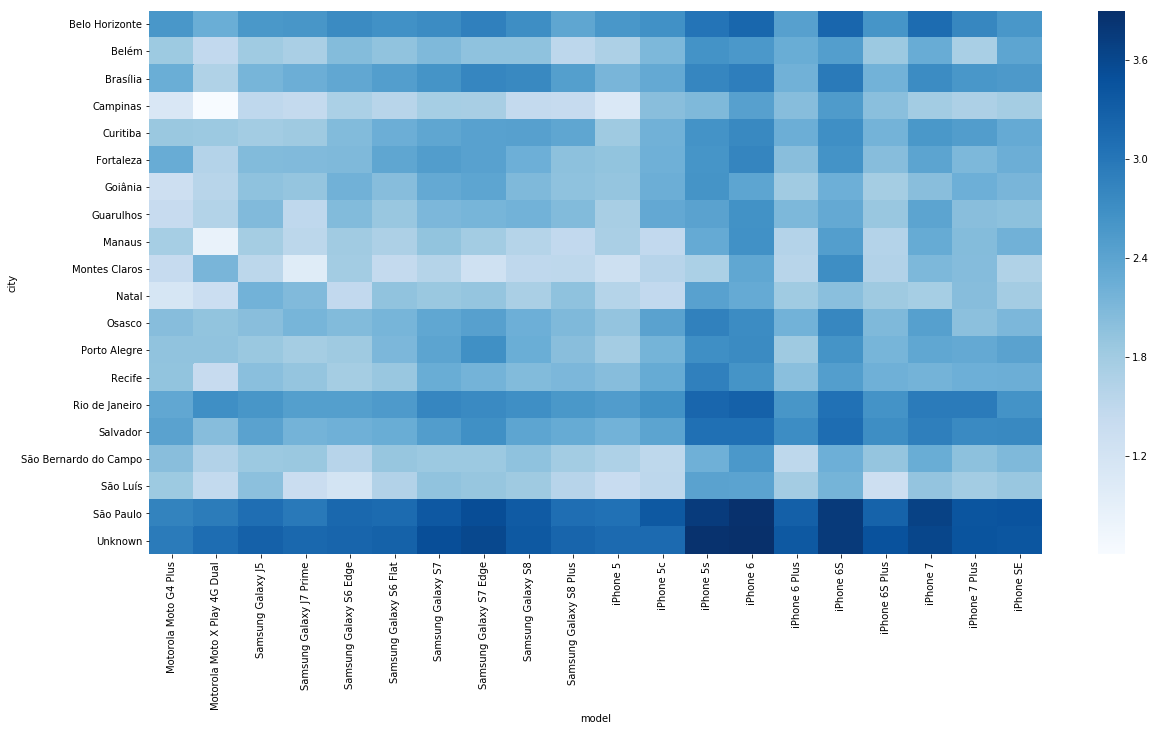

In [78]:
personas = data[data['event'] == 'visited site']
personas = data[['person', 'country', 'city', 'region', 'device_type', 'screen_resolution', 'operating_system_version', 'browser_version']]
personas = personas.dropna().drop_duplicates('person')

vistas = data[data['event'] == 'viewed product']
vistas = vistas[['person', 'model']]
vistas_por_ciudad = pd.merge(personas, vistas, on='person', how='inner')

# Filtramos un poco la data
vistas_por_ciudad = vistas_por_ciudad[vistas_por_ciudad['model'].isin(modelos_mas_vistos)]
vistas_por_ciudad = vistas_por_ciudad[vistas_por_ciudad['city'].isin(ciudades_mas_activas)]
# vistas_por_ciudad

graf = vistas_por_ciudad.groupby(['city', 'model']).size().to_frame('vistas').reset_index()
graf['vistas_log'] = np.log10(graf['vistas'])
graf = graf.pivot(columns = 'model', index = 'city', values = 'vistas_log')
graf.fillna(0,inplace=True)
plt.figure(figsize = (20, 10))
sns.heatmap(graf, cmap = 'Blues')

## Esto tiene sentido?

# Sistema operativo por el cual se realizan más compras

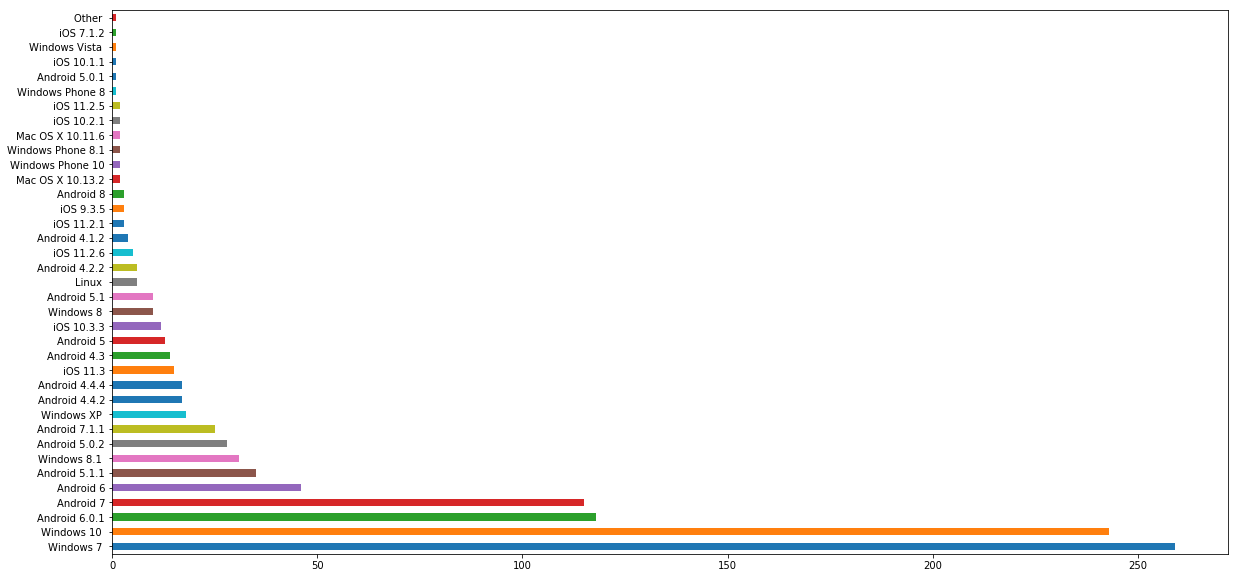

In [94]:
conversiones = data[data['event'] == 'conversion']
conversiones = conversiones[['person', 'model']]
conversiones_merge = pd.merge(personas, conversiones, on='person', how='inner')
conversiones_merge
# Filtramos un poco la data
# conversiones_merge = vistas_por_ciudad[vistas_por_ciudad['model'].isin(modelos_mas_vistos)]
# conversiones_merge = vistas_por_ciudad[vistas_por_ciudad['city'].isin(ciudades_mas_activas)]
# vistas_por_ciudad

conversiones_merge.operating_system_version.value_counts().plot(kind = 'barh', figsize = (20, 10))

### Si bien la mayor cantidad de las visitas al sitio provienen de dispositivos móviles, la mayoría de las conversiones se ejecutan a través de una computadora.

# Tamaño de resolucion donde se ejecutan la mayor cantidad de conversiones

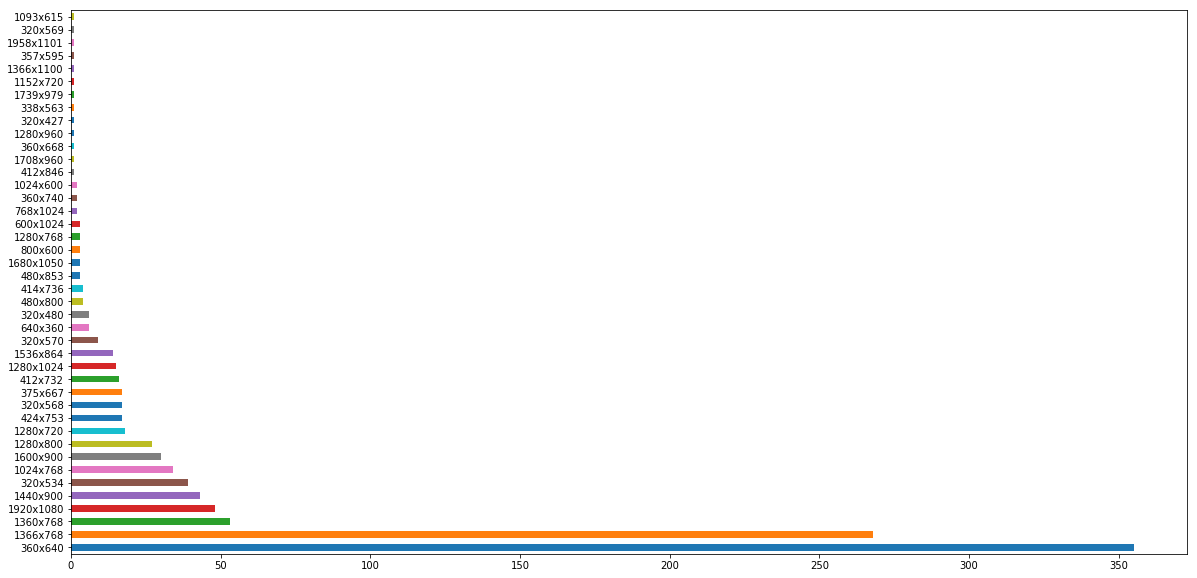

In [97]:
conversiones_merge.screen_resolution.value_counts().plot(kind = 'barh', figsize = (20, 10))

### La mayor cantidad es 360x640. No tiene sentido...

Me llama la atención que haya actividad de dispositivos tan chicos (320x570, 520x534, 424,753)

In [ ]:
conversiones_merge.operating_system_version.value_counts().plot(kind = 'barh', figsize = (20, 10))conversiones_merge.operating_system_version.value_counts().plot(kind = 'barh', figsize = (20, 10))conversiones_merge.operating_system_version.value_counts().plot(kind = 'barh', figsize = (20, 10))conversiones_merge.operating_system_version.value_counts().plot(kind = 'barh', figsize = (20, 10))